# <center><font size=10, color="#7B242F"><u> Regression Trees</u> </font>

## <center><font size=6, color="#7B242F"><u> Regression Trees Theory</u> </font>

## Introduction

 - Regression Tree is used with continous target (response) variable. 


 - Regression trees partition the data into smaller groups that are more homogenous with respect to the response. To achieve outcome homogeneity, regression trees determine:

    - The predictor to split on and value of the split 
    - The depth or complexity of the tree
    - The prediction equation in the terminal nodes

## Process of Building Regression Trees

We present in this section one technique of how regression trees works:
 
- The algorithm begins with:
    - The entire data set, **S**
    - Searches:
        - Every **distinct** value of **every predictor**
        - Partitining the data into two groups (**S1, S2**) based on the predictor the **minimizes the Sum Squares of Errors**
        
    - Within each of groups **S1** and **S2**, this method searches for the predictor and split value that best reduces **RSS**.
         - The groups **S1** and **S2** might split to other groups based the best predictor that minimizes the RSS the most.
         - The process will be repeated **recursively** for the new regions.
         - The process will continue until it reaches some conditions, they are called stopping conditions such as min split or max depth. 
         - Once the regions or groups have been created, the predicted response for new observations will be the mean of the training data in the region to which that new data point belongs. 

     
> **Because of the recursive splitting nature of regression trees, this method is also known as recursive partitioning.**



**The RSS Formula to minimize is given as follows**, 

  
### $$\textbf{RSS}=\sum_{i \in (S_1)}(y_{i} - \hat{y}_{1})^2 + \sum_{i \in (S_2) }(y_{i} - \hat{y}_{2})^2$$ 

**Where**,

 - $\hat{y}_{1}$: is the mean response for the training observations in the group $S_1$.  
 
 - $\hat{y}_{2}$: is the mean response for the training observations in the group $S_2$. 

### Tree Regions (Groups)

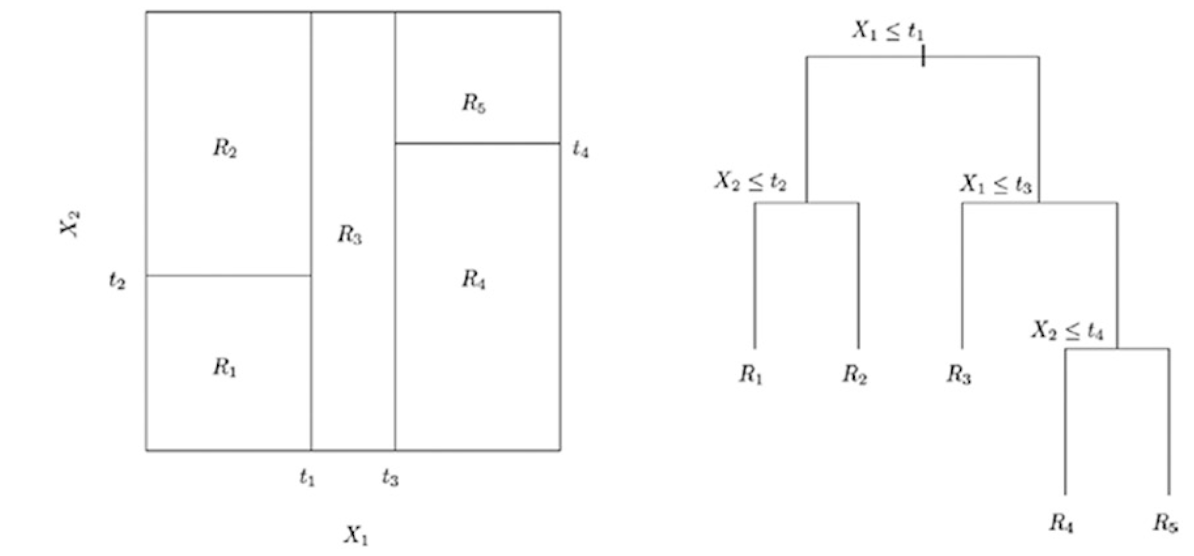

## <u>Information Criterion for Regression Trees</u>

 - In this section, we will present the **impurity metrics** for regression trees to explain how this algorithm works in more practical manner.
 
- It's important to note that, when a regression tree is trained on a dataset, the impurity of a node is measured using the **mean-squared error (MSE)** of the targets in that node. This means that the regression tree tries to find the splits that produce leaf nodes where in each leaf the target values are on average, the closest possible to the mean-value of the labels in that particular leaf.


### $$J(f, sp_{f}) = \frac{N_{left}}{N} \textbf{MSE}_{left} + \frac{N_{right}}{N} \textbf{MSE}_{right}$$

**Where**, 

 - **f**: The feature to split on
 - **sp**: the cutpoint to where split occurs

**Here is another neat formula**,

### $$\textbf{I (Node)}=\underbrace{\textbf {MSE (Node)}}_\textbf{Mean-Squared-Error} = \frac{1}{N_{node}} \sum_{i \in node} \Big (y^{(i)} - \hat y_{node} \Big)^{2}$$

**Where**,

 - **I**: Impurity metric, which is the **mse**
 - $\mathbf{\hat y}$:  is the predicted average **$\bar y$** in the respective region.

### $$\underbrace{\hat y_{node}}_\textbf{Mean-Target-Value} = \frac{1}{N_{node}} \sum_{i \in node} y^{(i)}$$


### Prediction

- As a new instance traverses the tree and reaches a certain leaf, its target-variable **y** is computed as the average of the target-variables contained in that leaf as shown in this formula.

### $$y_{pred} \Big( leaf \Big) = \frac{1}{N_{leaf}} \sum_{i \in leaf}y^{(i)}$$


## Advantages and Limitations of Regression Trees

### Advantages
  -  The model is simple and interpretable in case of small tree.
  - They are easy to unterstand, easy to use.
  - They are powerful
  - They are versatile
  - Tree models  conduct feature selection; if a predictor is never used in a split, then this predictor is not important.

### Limitations

  - Regression trees are prone to overfitting; in other words, they are unstable.
  - The algorithm depends on orthogonality (the decision boundaries are perpendicular or rectangular)
  -  Trees suffer from **selection bias**, predictors with a higher number of distinct values are favored over more granular predictors
  - **Regression trees make poor predictions for samples whose true outcomes are extremely high or low, because they depend on the average of outcomes in the terminal nodes**. 

# <center><font size=7, color="#7B242F"><u> Regression Trees: Practice</u> </font>

## Data Description





**Attribute Information:**
___

1. **mpg**: continuous
2. **cylinders**: multi-valued discrete
3. **displacement**: continuous
4. **horsepower**: continuous
5. **weight**: continuous
6. **acceleration**: continuous
7. **model year**: multi-valued discrete
8. **origin**: multi-valued discrete
9. **car name**: string (unique for each instance)

[Data source](https://archive.ics.uci.edu/ml/datasets/auto+mpg)

In [1]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# import DecisionTreeRegressor from sklearn.tree 
from sklearn.tree import DecisionTreeRegressor

# import the functions train_test_split() from sklearn.model_selection
from sklearn.model_selection import train_test_split

# from sklearn.metrics import necessary metrics
from sklearn.metrics import mean_squared_error as MSE

# Import visualization tools
# --------------------------
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image, display 
import pydotplus


# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline 

In [2]:
## ======================================================================
#            Reading and Exploring the data
## ======================================================================


auto = pd.read_csv('auto_mpg.csv')
print("*" * 50)
auto.info()
print("*" * 50)
auto.head(10)

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
**************************************************


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.000,8,307.000,130,3504,12.000,70,1,chevrolet chevelle malibu
1,15.000,8,350.000,165,3693,11.500,70,1,buick skylark 320
2,18.000,8,318.000,150,3436,11.000,70,1,plymouth satellite
3,16.000,8,304.000,150,3433,12.000,70,1,amc rebel sst
4,17.000,8,302.000,140,3449,10.500,70,1,ford torino
5,15.000,8,429.000,198,4341,10.000,70,1,ford galaxie 500
6,14.000,8,454.000,220,4354,9.000,70,1,chevrolet impala
7,14.000,8,440.000,215,4312,8.500,70,1,plymouth fury iii
8,14.000,8,455.000,225,4425,10.000,70,1,pontiac catalina
9,15.000,8,390.000,190,3850,8.500,70,1,amc ambassador dpl


In [3]:
#auto['horsepower'] = pd.to_numeric(auto.horsepower, errors = 'coerce')
#auto['horsepower'].isnull().sum()

In [4]:
#auto[auto['horsepower']=='?'] 
auto.loc[auto['horsepower']=='?', 'horsepower'] = np.nan
auto['horsepower'] = auto['horsepower'].astype('float')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [5]:
auto.dropna(inplace=True)
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## Data Preprocessing 

  - We will map the `origin` variable to origin names
  - Then we perform `dummy_coding` using `pd.get_dummies()` function

In [6]:
# Mapping the origin variable to names
# ------------------------------------

auto['origin'] = auto['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

# Encoding the origin variable
# ------------------------------
auto = pd.get_dummies(auto, columns = ['origin'], prefix = '', 
                      prefix_sep = '', drop_first=True)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Japan,USA
0,18.000,8,307.000,130.000,3504,12.000,70,chevrolet chevelle malibu,0,1
1,15.000,8,350.000,165.000,3693,11.500,70,buick skylark 320,0,1
2,18.000,8,318.000,150.000,3436,11.000,70,plymouth satellite,0,1
3,16.000,8,304.000,150.000,3433,12.000,70,amc rebel sst,0,1
4,17.000,8,302.000,140.000,3449,10.500,70,ford torino,0,1


## Data Exploration

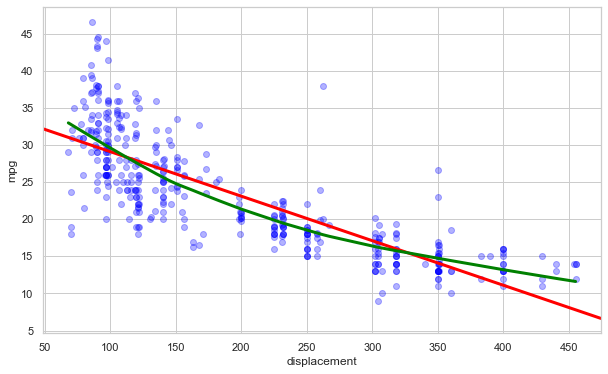

In [7]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 6))
#sns.scatterplot(x = 'displacement', y = 'mpg', data = auto)
sns.regplot(x = 'displacement', y = 'mpg', 
            data = auto,
            ci=None, 
            truncate=False,
            scatter_kws={"color": "blue", "alpha": 0.3}, 
            line_kws={"color": "red", "lw":3})

sns.regplot(x = 'displacement', y = 'mpg', 
            data = auto,
            ci=None, 
            scatter=False,
            truncate=False,
            lowess=True,
            line_kws={"color": "green", "lw":3})

plt.show()

## Training Regression Tree On a Single Feature

In [8]:
## =======================================================
#        Splitting the data
## =======================================================

X1 = auto['displacement']
y1 = auto['mpg']

X1 = np.array(X1).reshape(-1, 1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, 
                                                    y1,
                                                    test_size=0.20, 
                                                    random_state=10)


In [9]:
# Fitting regression trees with different depths
# ----------------------------------------------

rt1 = DecisionTreeRegressor(random_state=1)
rt2 = DecisionTreeRegressor(random_state=1, max_depth=2)
rt8 =  DecisionTreeRegressor(random_state=1, max_depth=8)

# Fitting the regressors
# -------------------------
rt1.fit(X_train1, y_train1)
rt2.fit(X_train1, y_train1)
rt8.fit(X_train1, y_train1)

DecisionTreeRegressor(max_depth=8, random_state=1)

In [10]:
# Computing predictions on train set
# ---------------------------------
y_pred_train1 = rt1.predict(X_train1)
y_pred_train2 = rt2.predict(X_train1)
y_pred_train8 = rt8.predict(X_train1)

# Computing MSEs
# --------------

train_mse1 = MSE(y_pred_train1, y_train1)
train_mse2 = MSE(y_pred_train2, y_train1)
train_mse8 = MSE(y_pred_train8, y_train1)

# Compute RMSEs
# --------------
train_rmse1 = np.sqrt(train_mse1)
train_rmse2 = np.sqrt(train_mse2)
train_rmse8 = np.sqrt(train_mse8)

# Print RMSEs
#------------
print("Train set RMSE of rt1 without max depth: {:.2f}".format(train_rmse1))
print("Train set RMSE of rt2 with max depth 2  : {:.2f}".format(train_rmse2))
print("Train set RMSE of rt8 with max depth 8  : {:.2f}".format(train_rmse8))

Train set RMSE of rt1 without max depth: 3.31
Train set RMSE of rt2 with max depth 2  : 4.24
Train set RMSE of rt8 with max depth 8  : 3.33


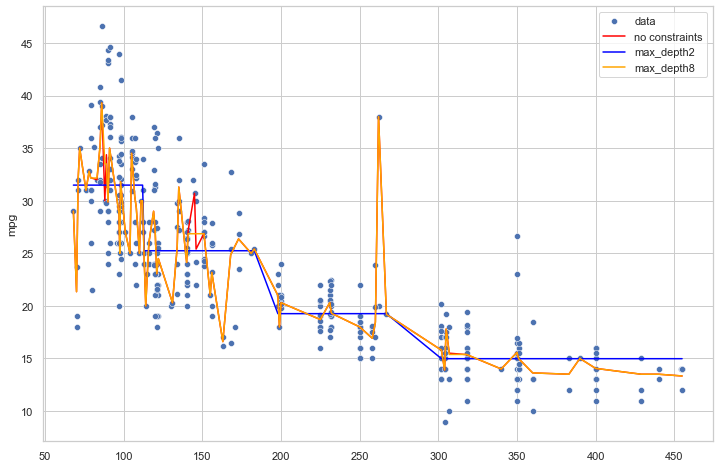

In [11]:
# Plotting the predictions on the train set
# -----------------------------------------

plt.figure(figsize=(12, 8))
sns.scatterplot(x = X1.ravel(), y = y1, 
                palette = {'color':'red'}, label="data")

sns.lineplot(x = X_train1.ravel(), y=y_pred_train1,
             color = "red", ci=None, label = "no constraints")
sns.lineplot(x = X_train1.ravel(), y=y_pred_train2, color = "blue",
             ci=None, label = "max_depth2")
sns.lineplot(x = X_train1.ravel(), y=y_pred_train8, color = "orange",
             ci=None, label = "max_depth8")
plt.show()

In [12]:
# Computing predictions on test set
# ---------------------------------
y_pred_test1 = rt1.predict(X_test1)
y_pred_test2 = rt2.predict(X_test1)
y_pred_test8 = rt8.predict(X_test1)

# Computing MSEs
# --------------

test_mse1 = MSE(y_pred_test1, y_test1)
test_mse2 = MSE(y_pred_test2, y_test1)
test_mse8 = MSE(y_pred_test8, y_test1)

# Compute RMSEs
# --------------
test_rmse1 = np.sqrt(test_mse1)
test_rmse2 = np.sqrt(test_mse2)
test_rmse8 = np.sqrt(test_mse8)

# Print RMSEs
#------------
print("Train set RMSE of rt1 without max depth: {:.2f}".format(test_rmse1))
print("Train set RMSE of rt2 with max depth 2  : {:.2f}".format(test_rmse2))
print("Train set RMSE of rt8 with max depth 8  : {:.2f}".format(test_rmse8))

Train set RMSE of rt1 without max depth: 4.34
Train set RMSE of rt2 with max depth 2  : 4.21
Train set RMSE of rt8 with max depth 8  : 4.37


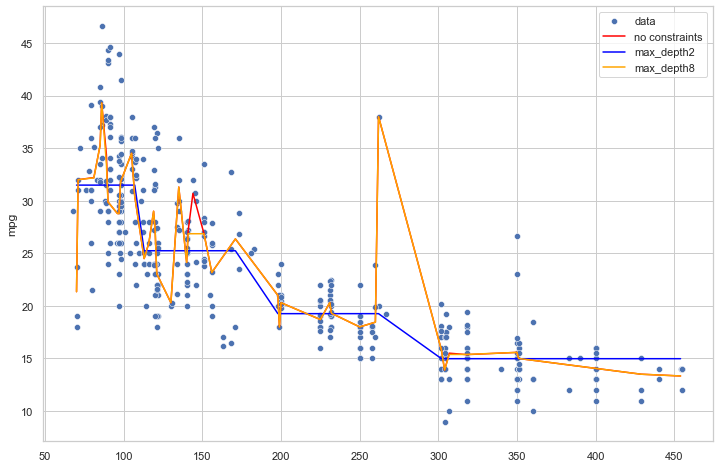

In [13]:
# Plotting the predictions on the train set
# -----------------------------------------

plt.figure(figsize=(12, 8))
sns.scatterplot(x = X1.ravel(), y = y1, 
                palette = {'color':'red'}, label="data")

sns.lineplot(x = X_test1.ravel(), y=y_pred_test1,
             color = "red", ci=None, label = "no constraints")
sns.lineplot(x = X_test1.ravel(), y=y_pred_test2, color = "blue",
             ci=None, label = "max_depth2")
sns.lineplot(x = X_test1.ravel(), y=y_pred_test8, color = "orange",
             ci=None, label = "max_depth8")
plt.show()

___

## Training Regression Tree Using All Features

In [14]:
## =======================================================
#        Splitting the data
## =======================================================

X = auto.drop(['mpg', 'car name'], axis=1)
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=3)


In [15]:
# =======================================================
#.      Train a regression tree with different max depth
# ======================================================

#rt = DecisionTreeRegressor(max_depth=22,
#                          min_samples_leaf=0.15,
#                          random_state=3)

rt1 = DecisionTreeRegressor(random_state=1)
rt2 = DecisionTreeRegressor(random_state=1, max_depth=2)
rt8 =  DecisionTreeRegressor(random_state=1, max_depth=8)
# Fit dt to the training set
rt1.fit(X_train, y_train)
rt2.fit(X_train, y_train)
rt8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=1)

## The Relationship between Max Depth and Train Error

In [16]:
# Compute y_pred
y_pred_train1 = rt1.predict(X_train)
y_pred_train2 = rt2.predict(X_train)
y_pred_train8 = rt8.predict(X_train)
# Compute mse_dt
mse1 = MSE(y_pred_train1, y_train)
mse2 = MSE(y_pred_train2, y_train)
mse8 = MSE(y_pred_train8, y_train)
# Compute rmse_dt
train_rmse1 = np.sqrt(mse1)
train_rmse2 = np.sqrt(mse2)
train_rmse8 = np.sqrt(mse8)
# Print rmse_dt
print("Train set RMSE of rt1 without max depth: {:.2f}".format(train_rmse1))
print("Train set RMSE of rt2 with max depth  2: {:.2f}".format(train_rmse2))
print("Train set RMSE of rt8 with max depth  8: {:.2f}".format(train_rmse8))

Train set RMSE of rt1 without max depth: 0.00
Train set RMSE of rt2 with max depth  2: 4.08
Train set RMSE of rt8 with max depth  8: 0.94


## Plotting the Regression Tree Predictions on Train Data

In [17]:
mpg = auto['mpg']
disp = auto['displacement'].values
disp_train = X_train.displacement.values
disp_test = X_test.displacement.values

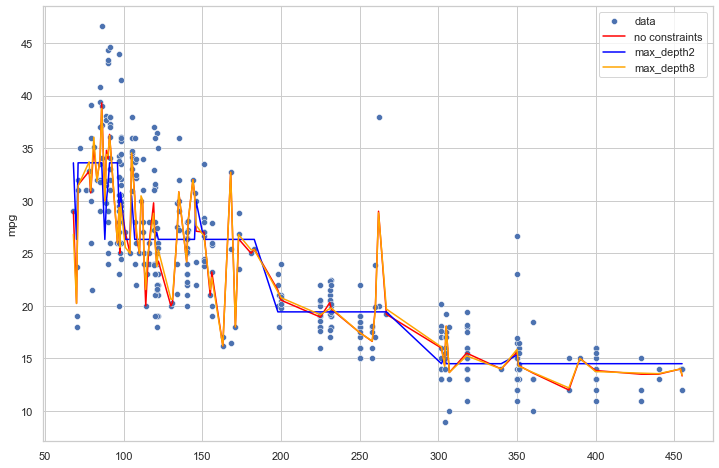

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = disp, y = mpg, palette = {'color':'red'}, label="data")
sns.lineplot(x = disp_train, y=y_pred_train1, color = "red", ci=None, label = "no constraints")
sns.lineplot(x = disp_train, y=y_pred_train2, color = "blue", ci=None, label = "max_depth2")
sns.lineplot(x = disp_train, y=y_pred_train8, color = "orange", ci=None, label = "max_depth8")
plt.show()

## Prediction on the test set

In [19]:
# Compute y_pred
y_pred1 = rt1.predict(X_test)
y_pred2 = rt2.predict(X_test)
y_pred8 = rt8.predict(X_test)
# Compute mse_dt
test_mse1 = MSE(y_pred1, y_test)
test_mse2 = MSE(y_pred2, y_test)
test_mse8 = MSE(y_pred8, y_test)
# Compute rmse_dt
test_rmse1 = np.sqrt(test_mse1)
test_rmse2 = np.sqrt(test_mse2)
test_rmse8 = np.sqrt(test_mse8)
# Print rmse_dt
print("Test set RMSE of rt1 without max depth: {:.2f}".format(test_rmse1))
print("Test set RMSE of rt2 with max depth  2: {:.2f}".format(test_rmse2))
print("Test set RMSE of rt8 with max depth  8: {:.2f}".format(test_rmse8))

Test set RMSE of rt1 without max depth: 3.23
Test set RMSE of rt2 with max depth  2: 3.78
Test set RMSE of rt8 with max depth  8: 3.01


## Plotting the Regression Tree Predictions on Test Set

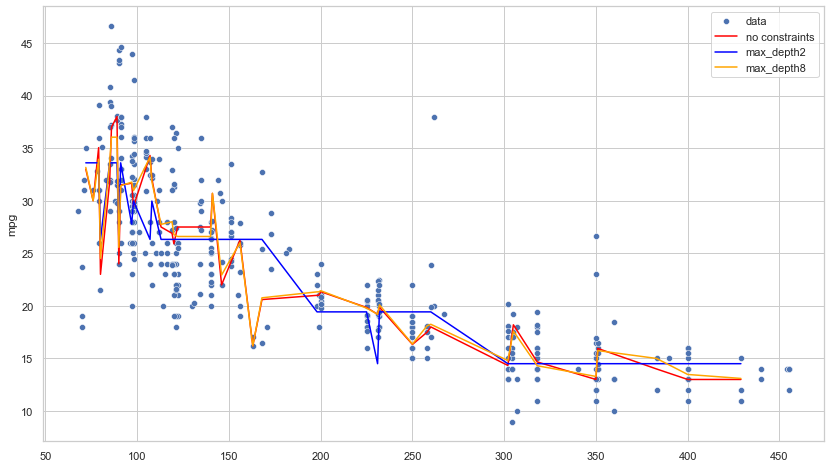

In [20]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = disp, y = mpg, palette = {'color':'red'},
                label="data")
sns.lineplot(x = disp_test, y=y_pred1, color = "red", ci=None, label = "no constraints")
sns.lineplot(x = disp_test, y=y_pred2, color = "blue", ci=None, label = "max_depth2")
sns.lineplot(x = disp_test, y=y_pred8, color = "orange", ci=None, label = "max_depth8")
plt.show()

---

## Train Regression Tree with More Constrains

  - In this section, we will train a regression tree but we use different constraints such as **max_depth**, **min_samples_leaf**, **random_state**. 

In [21]:
# Instantiate a tree regressor
# -----------------------------
rt = DecisionTreeRegressor(max_depth=8,
               min_samples_leaf=0.10,
               random_state=3)

# Fit the tree regressor
# ----------------------
rt.fit(X_train, y_train)

# Generate predictions
# ---------------------
preds = rt.predict(X_test)

# Compute the rmse
rmse = np.sqrt(MSE(preds, y_test))


# Print the rmse metric
# -----------------------
print("Test set RMSE: {:.2f}".format(rmse))

Test set RMSE: 3.14


**Remark**:
    
   - I was trying different random number generators like (1, 3, 10) when splitting and train the the regressor, untill I got this result `3.14`. **How good is this result?** and **Is it a trustworthy result?**

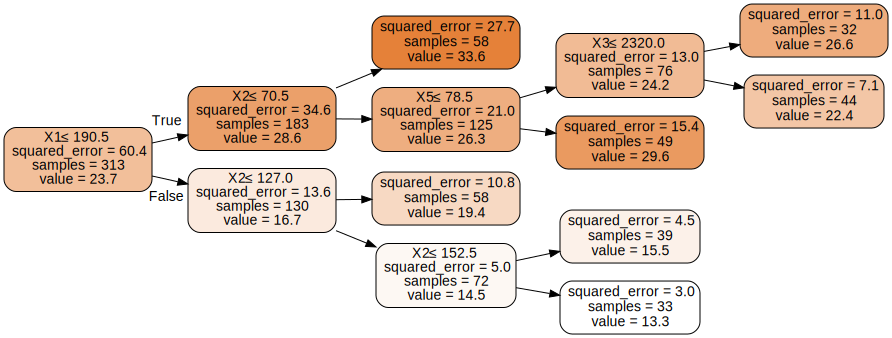

In [22]:
import graphviz
dot_data = export_graphviz(rt, 
                           out_file=None,  
                           filled=True,    
                           rounded=True,
                           special_characters=True,
                           precision=True,
                          rotate=True)


graph = graphviz.Source(dot_data)  
graph  

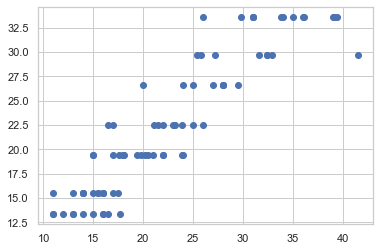

In [23]:
# Ploting the predictions VS actual values
#----------------------------------------
plt.scatter(y_test,preds)

## Auto Dataset Regression Tree Hyperparameter Tuning

  - I am going to use `GridSeachCV` to tune the model hyperparameters. And, I will use three hyperparameters:
      - max_depth
      - min_sample_leaf
      - max_features
**We hope we can do better**👌👌👌

In [24]:
## =======================================================
#   Regression Tree Hyper parameter tuning In Practice
## =======================================================

# Import GridSearchCV
#----------------------
from sklearn.model_selection import GridSearchCV

# Instantiate a regressor
# ----------------------
regtree = DecisionTreeRegressor()

# Construct the grid
# ------------------
param_grid = {
    "max_depth" : [1,3,5],
    "min_samples_leaf":np.arange(0.01, 0.15, 0.01),
    "max_features":["auto","log2"]
}

# Instantiate the Grid search objet

mpg_tuning_model = GridSearchCV(
    regtree,param_grid=param_grid,
    scoring = 'neg_mean_squared_error', 
    cv= 5,
    verbose=1
)

In [25]:
# Fitting the model
# -----------------
mpg_tuning_model.fit(X_train, y_train) 

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14])},
             scoring='neg_mean_squared_error', verbose=1)

In [26]:
# Choosing the best estimator
# -------------------------
mpg_tuning_model.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=0.02)

In [27]:
# What is the best score?
# ----------------------
print("The best score achieved using grid search is: {:.3f}".format(
    - mpg_tuning_model.best_score_))

The best score achieved using grid search is: 11.747


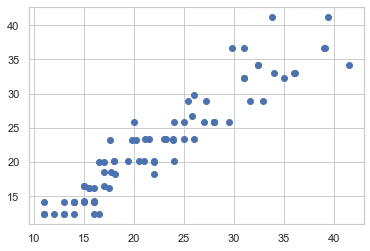

In [28]:
# Refitting the model using the best found hyper parameter
# -------------------------------------------------------
tuned_model = DecisionTreeRegressor(
    max_depth=5, max_features='auto',
    min_samples_leaf=0.02
)

# Refit the model
# ---------------
tuned_model.fit(X_train, y_train)

# Generate predictions using the tuned model
# ------------------------------------------
tuned_pred=tuned_model.predict(X_test)

# print the results
#-------------------
plt.scatter(y_test,tuned_pred)
plt.show()

In [29]:
## =======================================================
#   Comparing the results of Tuned model VS. Untuned Model
## =======================================================
from sklearn import metrics

# Fitting untuned model for the purpose of comparison
# ---------------------------------------------------
untuned_model = DecisionTreeRegressor(random_state=10)

# Fit the tree regressor
# ----------------------
untuned_model.fit(X_train, y_train)

# Generate predictions
# ---------------------
untuned_preds = untuned_model.predict(X_test)


print("The Results of the Tuned Model".center(40))
print("*"*40)
print(f'MAE: {metrics.mean_absolute_error(y_test,tuned_pred): 25}')
print(f'MSE: {metrics.mean_squared_error(y_test, tuned_pred):25}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)):25}')
print("*"*40, "\n")

print("The Results of the Untuned Model".center(40))
print("*"*40)

print(f'MAE: {metrics.mean_absolute_error(y_test,untuned_preds): 25}')
print(f'MSE: {metrics.mean_squared_error(y_test, untuned_preds): 25}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, untuned_preds)): 25}')
print("*"*40)

     The Results of the Tuned Model     
****************************************
MAE:         2.121364528459925
MSE:         7.239281275679376
RMSE:        2.690591250204939
**************************************** 

    The Results of the Untuned Model    
****************************************
MAE:        2.2177215189873416
MSE:        10.122784810126582
RMSE:        3.181632412791676
****************************************


****************